#  Forecasting Assignment-1 
Forecast the CocaCola prices and Airlines Passengers data set. Prepare
 a document for each model explaining 
how many dummy variables you have created and RMSE value for each model.
Finally which model you will use for 
Forecasting.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import statsmodels.formula.api as smf 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
##--EDA---
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
df.shape

(96, 2)

In [6]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
list(df)

['Month', 'Passengers']

In [8]:
df.set_index('Month', inplace=True)
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


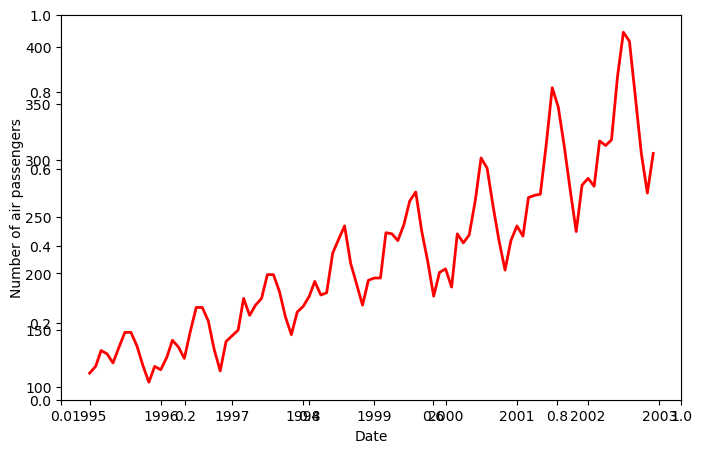

In [9]:
# Lineplot for Passengers
plt.figure(figsize=(8,5))
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
ax = plt.axes()
plt.plot(df['Passengers'], color = 'red', linewidth=2)

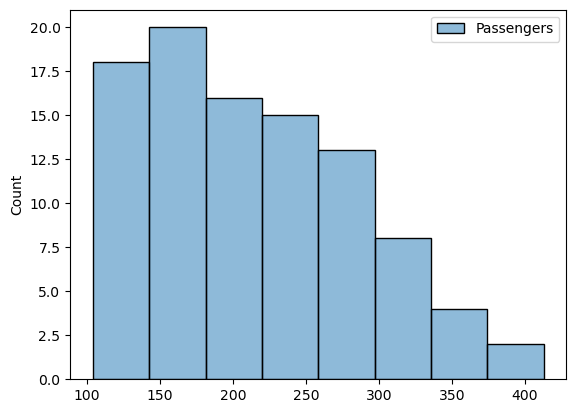

In [10]:
##---Histogram--
sns.histplot(df)
plt.show()

<Axes: ylabel='Density'>

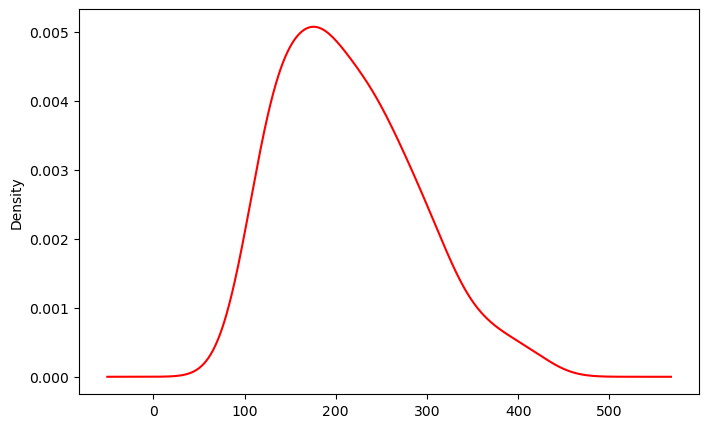

In [11]:
# Density Plot
ax = plt.axes()
df['Passengers'].plot(kind = 'kde', figsize=(8,5), color = 'red')

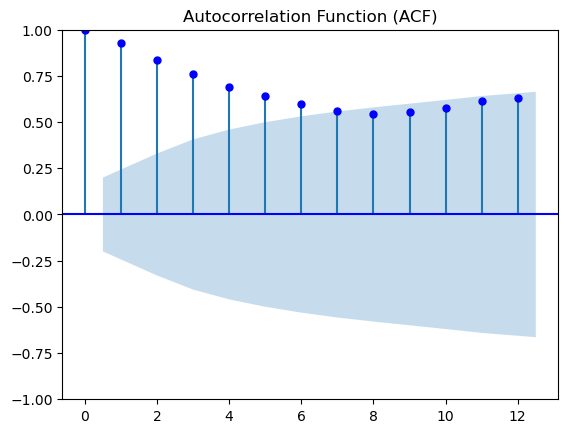

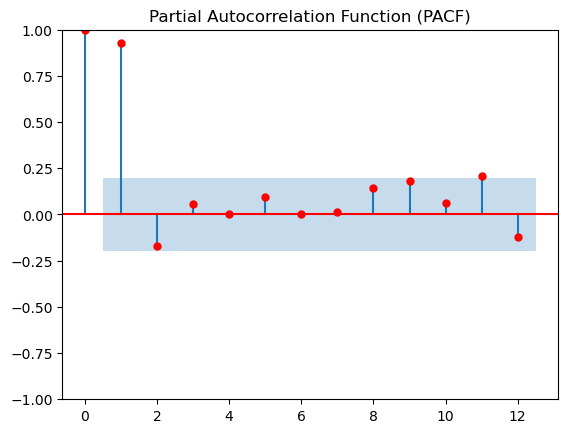

In [12]:
tsa_plots.plot_acf(df.Passengers, lags=12, color='Blue')
plt.title('Autocorrelation Function (ACF)')
plt.show()
# Plot PACF with colors
tsa_plots.plot_pacf(df.Passengers, lags=12, color='red')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [13]:
# Splitting data into Train and Test (77/33)
Train = df.head(84)
Test = df.tail(12)

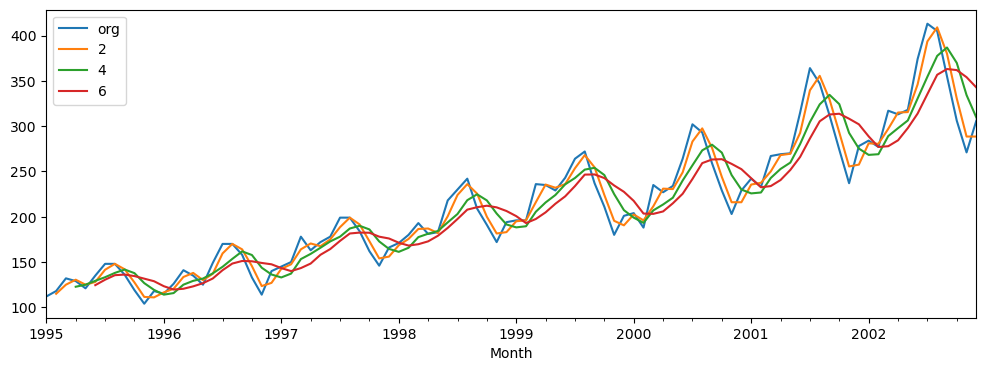

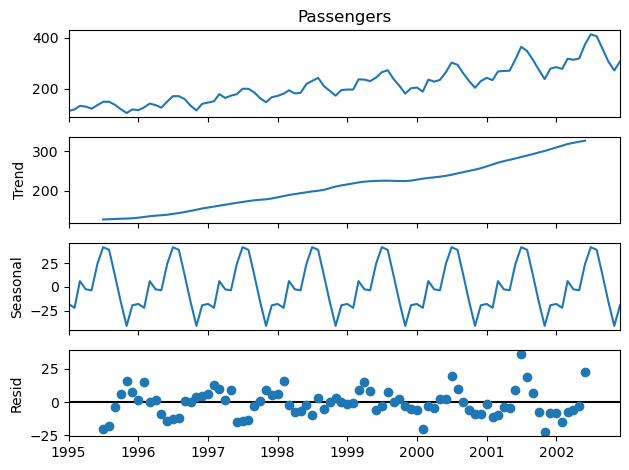

In [14]:
plt.figure(figsize=(12,4))
df.Passengers.plot(label="org")
for i in range(2,8,2):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [15]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse


In [16]:
##--Simple Exponential method
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Passengers, pred_ses)
rmse_ses_model

68.0067403134932

In [17]:
##--holt method
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Passengers, pred_hw)
rmse_hw_model

52.92196508333604

In [18]:
##--Holt method with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Passengers, pred_hwe_add_add)
rmse_hwe_add_add_model

62.71208217570936

In [19]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Passengers, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

64.66373828300254

In [20]:
# Data preprocessing for models
data1 = df.copy()
data1.head()
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [21]:
data1["t"] = np.arange(1,97)
data1["t_squared"] = data1["t"]*data1["t"]

data1["log_psngr"] = np.log(data1["Passengers"])

data1.head()

,Passengers,t,t_squared,log_psngr
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791


In [22]:
# Splitting data into Train and Test (77/33)
Train = data1.head(84)
Test = data1.tail(12)

In [23]:
###--linear model
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Passengers'], pred_linear)
rmse_linear_model

53.199236534802715

In [24]:
##--Exponential model
Exp = smf.ols('log_psngr~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_Exp_model

46.0573611031562

In [25]:
###---Quadratic model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Passengers'], pred_Quad)
rmse_Quad_model

48.051888979330975

In [26]:
##-Additive model
add_sea = smf.ols('Passengers~t',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['t']]))
rmse_add_sea = RMSE(Test['Passengers'], pred_add_sea)
rmse_add_sea

53.199236534802715

In [27]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['t','t_squared']]))
rmse_add_sea_Quad_model = RMSE(Test['Passengers'], pred_add_sea_quad)
rmse_add_sea_Quad_model 

48.051888979330975

In [28]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_psngr~t',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

46.0573611031562

In [29]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_psngr~t+t_squared',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

49.343138587275135

In [30]:
#Compare the results 
data = {"MODEL":pd.Series(["rmse_linear_model","rmse_Exp_model","rmse_Quad_model","rmse_add_sea","rmse_add_sea_quad_model","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":
        pd.Series([rmse_linear_model,rmse_Exp_model,rmse_Quad_model,rmse_add_sea,rmse_add_sea_Quad_model,rmse_Mult_sea,rmse_Mult_add_sea])}
type(data)

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp_model,46.057361
5,rmse_Mult_sea,46.057361
2,rmse_Quad_model,48.051889
4,rmse_add_sea_quad_model,48.051889
6,rmse_Mult_add_sea,49.343139
0,rmse_linear_model,53.199237
3,rmse_add_sea,53.199237


## --Inferences--
1	rmse_Exp_model	46.057361
5	rmse_Mult_sea	46.057361
2	rmse_Quad_model	48.051889
4	rmse_add_sea_quad_model	48.051889
6	rmse_Mult_add_sea	49.343139
0	rmse_linear_model	53.199237
3	rmse_add_sea	53.199237